In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

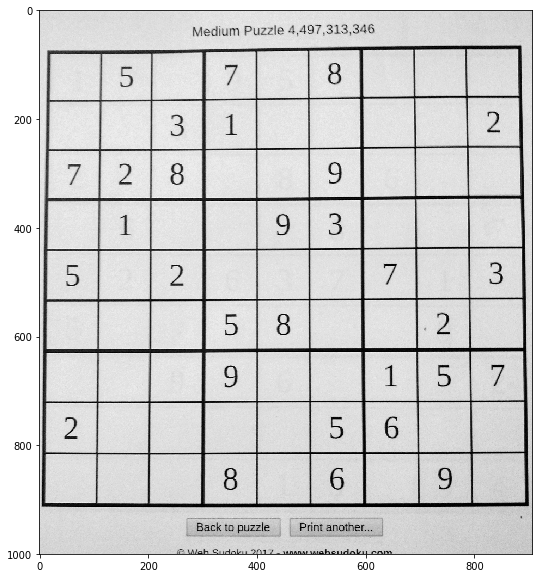

In [10]:
img = plt.imread('./Data/S_03.jpg')

#Convert img to grayscale(BGR2GRAY)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize the image
r, c = gray.shape
out_row = 1000
gray = cv2.resize(gray, (int(out_row * float(c)/r), out_row))

plt.figure(num = 0, figsize=(10, 10))
plt.imshow(gray, 'gray')
plt.show()

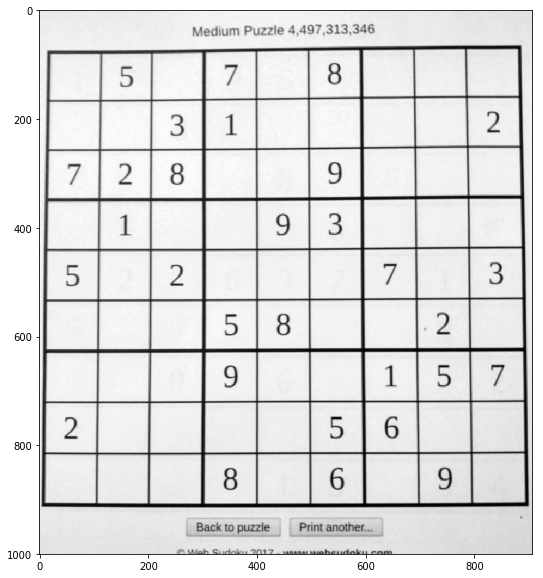

In [11]:
# noise removal with gaussian blur
gray = cv2.GaussianBlur(gray, (5, 5), 0)

plt.figure(num = 0, figsize=(10, 10))
plt.imshow(gray, cmap = 'gray')

plt.show()

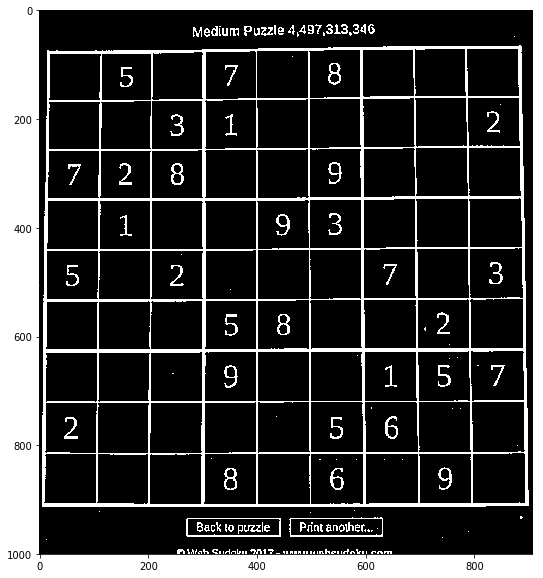

In [12]:
# adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst
# cv2.ADAPTIVE_THRESH
# _MEAN_C : threshold value is the mean of neighbourhood area.
# _GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
# Block Size decides the size of neighbourhood area
# C is a constant which is subtracted from the mean or weighted mean calculated.
im_th = cv2.adaptiveThreshold(gray, 255, 1, 1, 11, 2)

plt.figure(num = 0, figsize=(10, 10))
plt.imshow(im_th, cmap = 'gray')

plt.show()

In [13]:
#find contours in the threshold image
# Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.
# contours is a Python list of all the contours in the image
# CHAIN_APPROX_SIMPLE has 4 (x,y) coordinates wheres _APPROX_NONE has many(700+) coordinates
contours, hierarchy = cv2.findContours(im_th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

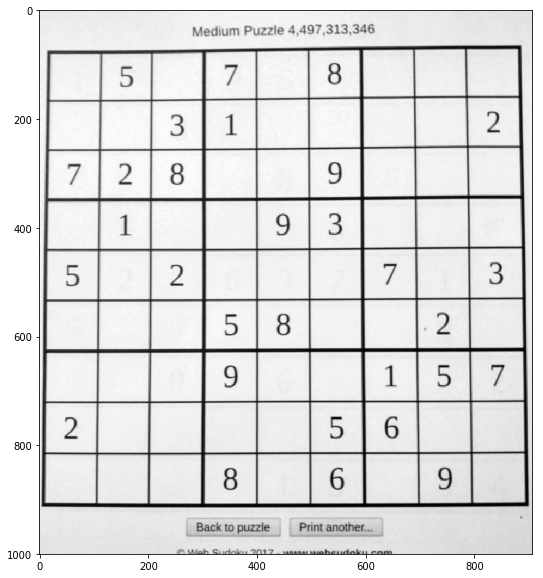

In [14]:
biggest = None
maxArea = 0

h, w = img.shape[:2]

#copy the original image to show the posible candidate
img_candidate = img.copy()


for i in contours:
    area = cv2.contourArea(i)
    if area > 50000:#50000 is an estimated value for the kind of blob we want to evaluate
        peri = cv2.arcLength(i, True)
        approx = cv2.approxPolyDP(i, 0.02 * peri, True)
        # store the biggest area
        # has the polygon 4 sides?
        if area > maxArea and len(approx) == 4:
            biggest = approx
if maxArea > 0:
    #draw biggest approx contour
    cv2.polylines(gray,[biggest], True, (0, 255, 0), 3)

plt.figure(num = 0, figsize=(10, 10))
plt.imshow(gray, cmap = 'gray')
plt.show()

In [15]:
#Rearranging the coordinates

# biggest -> [top-right, top-left, bottom-right, bottom-left]
a = biggest.reshape(4, 2)
b = np.zeros((4,2), dtype = np.float32)

add = a.sum(1)
b[0] = a[np.argmin(add)]
b[2] = a[np.argmax(add)]

diff = np.diff(a, axis = 1)
b[1] = a[np.argmin(diff)]
b[3] = a[np.argmax(diff)]
# b -> [top-left, top-right, bottom-right, bottom-left]
biggest = b

In [16]:
cnt = contours[0]
print cnt

[[[437 998]]

 [[441 998]]]
